## Exercises

<b>Download the Olympic history dataset from https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results and complete these exercises.</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression      
from sklearn.metrics import mean_squared_error          


1) Look at 10 rows of the dataset (top or bottom).

In [41]:
df = pd.read_csv("athlete_events.csv")
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


This dataset stores information about past performances of athletes on Olympic games. 

2) Look at the distribution of values (value counts of different values) in the column `'Medal'`.

Notice how the function used sorts values in descending order - it will be useful later on.

In [8]:
medal = df['Medal'].value_counts()
print(medal)

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


3) Check the distribution of `NaNs` across columns. What does the presence of `Nan` mean in each column?

In [14]:
NANs_values = df.isna().sum()
print(NANs_values)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


4. Calculate participation according to year in sport.

In [22]:
participation_year = df.groupby(['Year', 'Sport']).size()
participation_year

Year  Sport        
1896  Athletics        106
      Cycling           41
      Fencing           15
      Gymnastics        97
      Shooting          65
                      ... 
2016  Triathlon        110
      Volleyball       283
      Water Polo       258
      Weightlifting    255
      Wrestling        346
Length: 906, dtype: int64

5. Calculate percentage athletes who won gold medal grouping by sport.

In [31]:
gold_medals  = df[df['Medal'] == 'Gold'].groupby('Sport').size()
gold_medals 


Sport
Aeronautics           1
Alpine Skiing       143
Alpinism             25
Archery             135
Art Competitions     49
                   ... 
Tug-Of-War           43
Volleyball          322
Water Polo          350
Weightlifting       217
Wrestling           413
Length: 66, dtype: int64

6) Select only the rows describing gold medalists and store them into `gold_df` variable.

In [36]:
gold_df = df[df['Medal'] == 'Gold']
gold_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


7) Calculate the average age of gold medalist.

In [37]:
gold_df['Age'].mean()

25.901013309134907

8) Show top 10 countries with respect to the number of gold medals won.

In [50]:
top_10 = df[df['Medal'] == 'Gold'].groupby('City').size().head(10)
top_10


City
Albertville    104
Amsterdam      245
Antwerpen      493
Athina         883
Atlanta        608
Barcelona      559
Beijing        671
Berlin         312
Calgary         87
Chamonix        55
dtype: int64

9) Visualise it using function `plot()`.

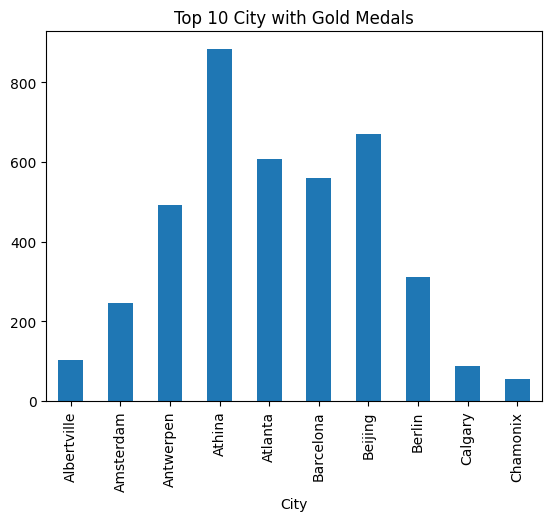

In [58]:
top_10.plot(kind='bar')

plt.title('Top 10 City with Gold Medals')  

# Show the plot
plt.show()

10) Create a new column `'height_diff'` with the deviation of height from the typical value in the segment.

In [ ]:
df['height_diff'] = ""

11) Plot the histogram of this newly calculated column.

12) Verify whether the majority of gold medalists were higher than the typical height of their segment.

In [61]:
df.groupby('Sex')['Height'].mean()


Sex
F    167.839740
M    178.858463
Name: Height, dtype: float64

13) Calculate mean age and standard deviation of gold medalists. Compare it with the youngest gold medalist.

In [64]:
mean = gold_df['Age'].mean()
std  = gold_df['Age'].std()
youngest_player = gold_df['Age'].min()

print(f"mean age is {mean}")
print(f"std is {std}")
print(f"Youngest player is {youngest_player}")

mean age is 25.901013309134907
std is 5.892886863678614
Youngest player is 13.0


14) Add a new column `'gold_span'` with the span in years of achieved gold medals. What is the maximal value of this span?

15) Select the rows describing the history of this athlete/these athletes that reached maximal span.

16. Find top performers in each Olympics (athletes who won the most medals).